In [29]:
import os, shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# def copyfile(animal, origin, end_dir):
#   fnames = [f'cat.{i}.jpg' for i in range(len(os.listdir(train_origin_dir)))]
#   for fname in fnames:
#     src = os.path.join(origin_dir, fname)
#     dest = os.path.join(train_cats, fname)
#     shutil.copyfile(src, dest)

In [9]:
origin_dir = "/Users/USER/Downloads/dogs-vs-cats"

train_origin_dir = "/Users/USER/Downloads/dogs-vs-cats/train"
test_origin_dir = "/Users/USER/Downloads/dogs-vs-cats/test"

base_dir = "/Users/USER/Downloads/cats-and-dogs"
os.mkdir(base_dir)


train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, "validation")
os.mkdir(val_dir)

test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir)

#cats
train_cats = os.path.join(train_dir, "cats")
os.mkdir(train_cats)
test_cats = os.path.join(test_dir, "cats")
os.mkdir(test_cats)
val_cats = os.path.join(val_dir, "cats")
os.mkdir(val_cats)

#dogs
train_dogs = os.path.join(train_dir, "dogs")
os.mkdir(train_dogs)
test_dogs = os.path.join(test_dir, "dogs")
os.mkdir(test_dogs)
val_dogs = os.path.join(val_dir, "dogs")
os.mkdir(val_dogs)

# fnames = [f'cat.{i}.jpg' for i in range(len(os.listdir(train_origin_dir)))]
# cats_count = 0
# dogs_count = 0

# cats_val = 0
# dogs_val = 0

# for file in os.listdir(train_origin_dir):
#   while cats_count < 10000:
#     if "cat" in file:
#       src = os.path.join(train_origin_dir, file)
#       dest = os.path.join(train_cats, file)
#       shutil.copyfile(src, dest)
#       print(f"copied {file}")
#       cats_count += 1

# while cats_val < 2500:
#   if "cat" in file:
#     src = os.path.join(train_origin_dir, file)
#     dest = os.path.join(val_cats, file)
#     shutil.copyfile(src, dest)
#     cats_val += 1
    
# while dogs_count < 10000:
#     if "dog" in file:
#       src = os.path.join(train_origin_dir, file)
#       dest = os.path.join(train_dogs, file)
#       shutil.copyfile(src, dest)
#       cats_count += 1

# while dogs_val < 2500:
#   if "dog" in file:
    # src = os.path.join(train_origin_dir, file)
    # dest = os.path.join(val_dogs, file)
    # shutil.copyfile(src, dest)
    # cats_val += 1

files = [f"cat.{i}.jpg" for i in range(10000)]
for file in files:
    src = os.path.join(train_origin_dir, file)
    dest = os.path.join(train_cats, file)
    shutil.copyfile(src, dest)

# print(os.listdir(des/t))

files = [f"cat.{i}.jpg" for i in range(10000, 12500)]
for file in files:
    src = os.path.join(train_origin_dir, file)
    dest = os.path.join(val_cats, file)
    shutil.copyfile(src, dest)

# print(os.listdir(dest))

files = [f"dog.{i}.jpg" for i in range(10000)]
for file in files:
    src = os.path.join(train_origin_dir, file)
    dest = os.path.join(train_dogs, file)
    shutil.copyfile(src, dest)

# print(os.listdir(dest))


files = [f"dog.{i}.jpg" for i in range(10000, 12500)]
for file in files:
    src = os.path.join(train_origin_dir, file)
    dest = os.path.join(val_dogs, file)
    shutil.copyfile(src, dest)




In [10]:
# for file in os.listdir(test_origin_dir):
#   src = os.path.join(test_origin_dir, file)
#   dest = os.path.join(test_dir, file)
#   shutil.copyfile(src, dest)


In [11]:
print("Total training cat images: ", len(os.listdir(train_cats)))
print("Total training dog images: ", len(os.listdir(train_dogs)))

Total training cat images:  10000
Total training dog images:  10000


In [49]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(512, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))


In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [51]:
model.compile(
  loss="binary_crossentropy",
  optimizer=optimizers.RMSprop(learning_rate=1e-4),
  metrics=["acc"]
  )

In [52]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
  val_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode="binary"
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [53]:
for data_batch, labels_batch in train_generator:
  print("data batch shape:", data_batch.shape)
  print("Labels batch shape: ", labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
Labels batch shape:  (20,)


In [54]:
history = model.fit(
  train_generator,
  steps_per_epoch=100,
  epochs=30,
  validation_data=validation_generator,
  validation_steps=50,
)

Epoch 1/30
100/100 [==============================] - 593s 5s/step - loss: 0.6996 - acc: 0.5160 - val_loss: 0.6787 - val_acc: 0.5360
Epoch 2/30
100/100 [==============================] - 419s 4s/step - loss: 0.6692 - acc: 0.5980 - val_loss: 0.6504 - val_acc: 0.6350
Epoch 3/30
100/100 [==============================] - 300s 3s/step - loss: 0.6494 - acc: 0.6155 - val_loss: 0.6138 - val_acc: 0.6580
Epoch 4/30
100/100 [==============================] - 300s 3s/step - loss: 0.6145 - acc: 0.6725 - val_loss: 0.6541 - val_acc: 0.6180
Epoch 5/30
100/100 [==============================] - 233s 2s/step - loss: 0.5817 - acc: 0.6875 - val_loss: 0.6572 - val_acc: 0.6270
Epoch 6/30
100/100 [==============================] - 197s 2s/step - loss: 0.5647 - acc: 0.7120 - val_loss: 0.5642 - val_acc: 0.7260
Epoch 7/30
100/100 [==============================] - 301s 3s/step - loss: 0.5529 - acc: 0.7200 - val_loss: 0.5252 - val_acc: 0.7490
Epoch 8/30
100/100 [==============================] - 354s 4s/step - 

In [55]:
model.save("cats_and_dogs_model.h5")

In [56]:
acc = history.history['acc']
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [57]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [58]:
epochs = range(1, len(loss) + 1)

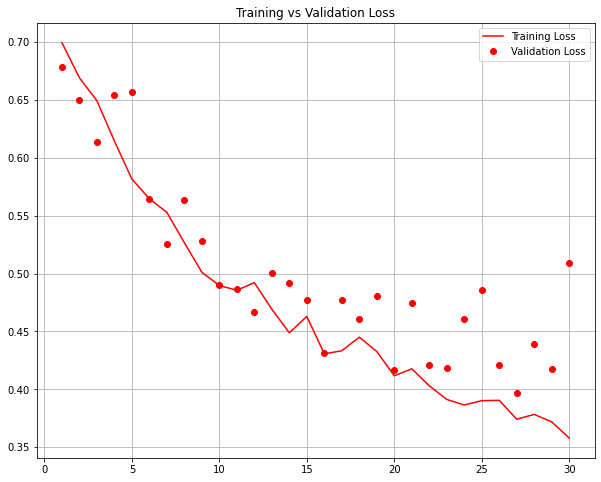

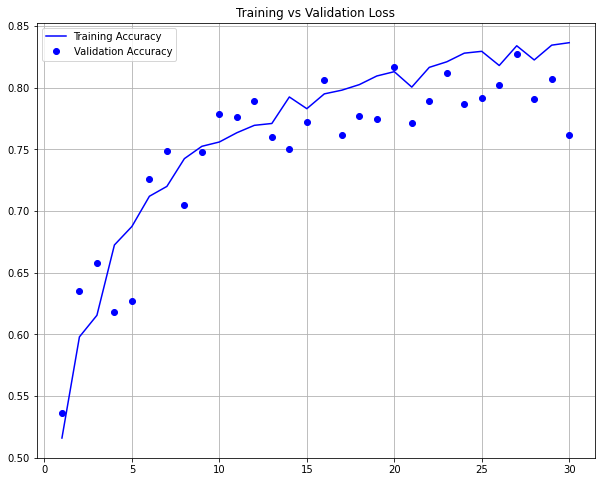

In [60]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(epochs, loss, "r", label="Training Loss")
plt.plot(epochs, val_loss, "ro", label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(epochs, acc, "b", label="Training Accuracy")
plt.plot(epochs, val_acc, "bo", label="Validation Accuracy")
plt.title("Training vs Validation Loss")
plt.legend()